<a href="https://colab.research.google.com/github/JulioSan02/UNCC/blob/4105/JS_4105_HW2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [790]:
# @title
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab_Notebooks/Data/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [791]:
# @title
print('Shape of housing data\n')
housing.shape


Shape of housing data



(545, 13)

In [792]:
# @title
# Checking Null values
print('Null information: \n')
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

Null information: 



price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [793]:
# @title
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Defining the map function
def data_map(x):
    return x.map({'yes': 1, 'no': 0, 'unfurnished': 0, 'semi-furnished': 0.5, 'furnished': 1})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(data_map)
print('All housing data with binary inputs replaced with ones and zeros: \n')
housing.head()

All housing data with binary inputs replaced with ones and zeros: 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,1.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,1.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,0.5
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,1.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,1.0


In [794]:
# @title
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
train, test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
print('Training set after data split : \n')
train.head()

Training set after data split : 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,8050,3,1,1,1.0,1.0,1.0,0.0,1.0,1,0.0,1.0
41,7840000,6360,3,2,4,1.0,0.0,0.0,0.0,1.0,0,1.0,1.0
91,6419000,6750,2,1,1,1.0,1.0,1.0,0.0,0.0,2,1.0,1.0
118,5950000,6420,3,1,1,1.0,0.0,1.0,0.0,1.0,0,1.0,1.0
472,3010000,3630,4,1,2,1.0,0.0,0.0,0.0,0.0,3,0.0,0.5


In [795]:
# @title
print('Test set after data split : \n')
test.head()

Test set after data split : 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,2880,3,1,2,1.0,0.0,0.0,0.0,0.0,0,1.0,0.5
54,7350000,6000,3,2,2,1.0,1.0,0.0,0.0,1.0,1,0.0,0.5
171,5250000,10269,3,1,1,1.0,0.0,0.0,0.0,0.0,1,1.0,0.5
244,4550000,5320,3,1,2,1.0,1.0,1.0,0.0,0.0,0,1.0,0.5
268,4382000,4950,4,1,2,1.0,0.0,0.0,0.0,1.0,0,0.0,0.5


In [796]:
# @title
def gradient_descent(train, test, price_train, price_test, alpha, theta, iterations):
    train_losses = []
    val_losses = []

    for iteration in range(iterations):
        gradients = 2/(len(train)) * train.T.dot(train.dot(theta) - price_train)
        theta -= alpha * gradients

        train_loss = (1/len(train)) * np.sum(np.square(train.dot(theta) - price_train))
        val_loss = (1/len(test)) * np.sum(np.square(test.dot(theta) - price_test))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses

Just the price column for trainig set : 
 [8645000. 7840000. 6419000. 5950000. 3010000.]

Just the price column for test set : 
 [4403000. 7350000. 5250000. 4550000. 4382000.]

 Length of training set =  436

 Length of test set =  109

 The final theta values for the linear model of part 1.a) using 5 inputs: 
 [2.14588162e-01 8.60510319e+02 6.97129338e-01 3.48639486e-01
 5.07147309e-01 1.77946851e-01]


Last loss value for the training set =  3380277895432.6636

Last loss value for the test set =  3216288715129.318


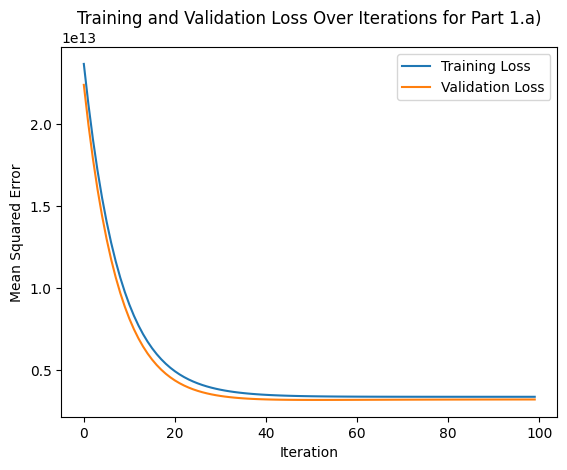

In [797]:
# @title
# Problem 1.a + b)

# initial values
price_train = train.values[:, 0]
print('Just the price column for trainig set : \n', price_train[:5])

price_test = test.values[:, 0]
print('\nJust the price column for test set : \n', price_test[:5])

train_len = len(price_train)  # Number of training examples for training set
print('\n Length of training set = ', train_len)
test_len = len(price_test)  # Number of training examples for test set
print('\n Length of test set = ', test_len)

vars_1a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
vars_1a_train = np.c_[np.ones((train_len, 1)), train[vars_1a]]
vars_1a_test = np.c_[np.ones((test_len, 1)), test[vars_1a]]

vars_1b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
vars_1b_train = np.c_[np.ones((train_len, 1)), train[vars_1b]]
vars_1b_test = np.c_[np.ones((test_len, 1)), test[vars_1b]]

# Train a simple linear regression model using gradient descent
alpha = 0.000000001
iterations = 100

theta_1a = np.zeros(6)
theta_1b = np.zeros(12)

# Gradient descent for part 1.a
train_losses, val_losses = gradient_descent(vars_1a_train, vars_1a_test, price_train, price_test, alpha, theta_1a, iterations)

# Linear model for part 1.a
print('\n The final theta values for the linear model of part 1.a) using 5 inputs: \n', theta_1a)
print('\n')

print('Last loss value for the training set = ', train_losses[-1])
print('\nLast loss value for the test set = ', val_losses[-1])

# 4. Plot the training and validation loss after each iteration for part 1.a
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Part 1.a)")
plt.show()


 The final theta values for the linear model of part 1.b) using 11 inputs: 
 [2.14588151e-01 8.60510276e+02 6.97129308e-01 3.48639472e-01
 5.07147289e-01 1.90985036e-01 5.59383985e-02 9.56840808e-02
 2.14020625e-02 1.09888717e-01 1.77946843e-01 6.78276027e-02]


Last loss value for the training set =  3380277629666.992

Last loss value for the test set =  3216288391290.199


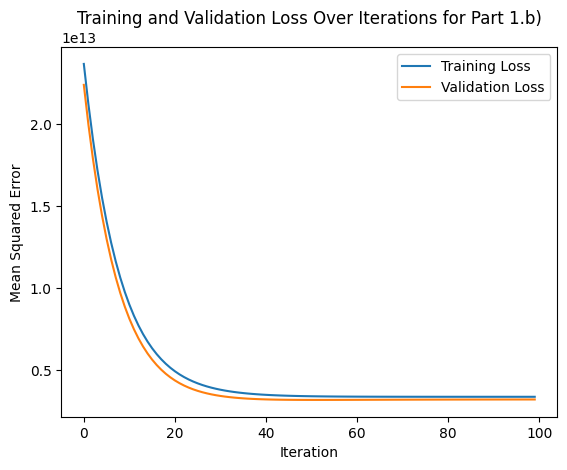

In [798]:
# @title
# Gradient descent for part 1.b
train_losses, val_losses = gradient_descent(vars_1b_train, vars_1b_test, price_train, price_test, alpha, theta_1b, iterations)

# Linear model for part 1.b
print('\n The final theta values for the linear model of part 1.b) using 11 inputs: \n', theta_1b)
print('\n')

print('Last loss value for the training set = ', train_losses[-1])
print('\nLast loss value for the test set = ', val_losses[-1])

# 4. Plot the training and validation loss after each iteration for part 1.b
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Part 1.b)")
plt.show()

In [799]:
# @title
# Problem 2.a) - Normalized Inputs

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_norm = MinMaxScaler()
scaler_stand = StandardScaler()

# Apply MinMax scaler to the training set columns for part 1.a) except the 'yes-no' and 'price' columns
train_norm_a = train
train_norm_a[vars_1a] = scaler_norm.fit_transform(train_norm_a[vars_1a])
print('Training set with only 5 inputs being normalized: \n')
train_norm_a.head()

Training set with only 5 inputs being normalized: 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0,1.0
41,7840000,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,1.0
91,6419000,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0,1.0
118,5950000,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,1.0
472,3010000,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.5


In [800]:
# @title
# Apply MinMax scaler to the testing set columns for part 1.a) except the 'yes-no' and 'price' columns
test_norm_a = test
test_norm_a[vars_1a] = scaler_norm.fit_transform(test_norm_a[vars_1a])
print('Test set with only 5 inputs being normalized: \n')
test_norm_a.head()

Test set with only 5 inputs being normalized: 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,0.088172,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.5
54,7350000,0.311828,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0,0.5
171,5250000,0.617849,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0,0.5
244,4550000,0.263082,0.333333,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0,0.5
268,4382000,0.236559,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.5


Normalized, stacked training set for part 2.a): 

 [[1.         0.4326093  0.4        0.         0.         0.33333333]
 [1.         0.31495405 0.4        0.33333333 1.         0.        ]
 [1.         0.34210526 0.2        0.         0.         0.66666667]
 [1.         0.31913116 0.4        0.         0.         0.        ]
 [1.         0.12489557 0.6        0.         0.33333333 1.        ]]

Normalized, stacked test set for part 2.a): 

 [[1.         0.08817204 0.33333333 0.         0.33333333 0.        ]
 [1.         0.31182796 0.33333333 0.5        0.33333333 0.33333333]
 [1.         0.61784946 0.33333333 0.         0.         0.33333333]
 [1.         0.26308244 0.33333333 0.         0.33333333 0.        ]
 [1.         0.23655914 0.66666667 0.         0.33333333 0.        ]]

 The final theta values for the linear model of part 2.a) using 5 normalized inputs: 
 [3022831.12000227 1632027.16515921 1439985.55973345 1276290.6054386
 1544970.75673438 1349879.93408192]


Last loss value

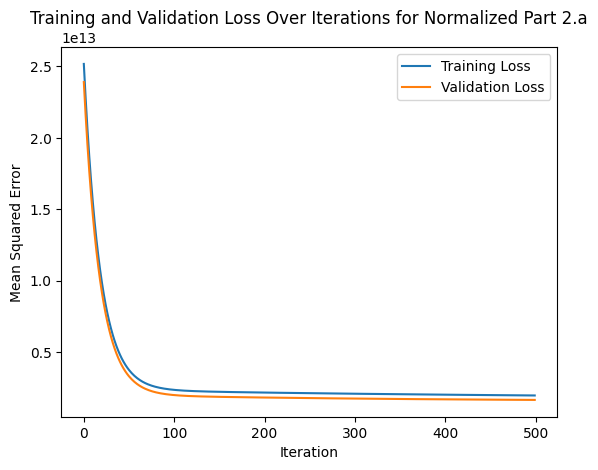

In [801]:
# @title
vars_2a_train_norm = np.c_[np.ones((train_len, 1)), train_norm_a[vars_1a]]
vars_2a_test_norm = np.c_[np.ones((test_len, 1)), test_norm_a[vars_1a]]
print('Normalized, stacked training set for part 2.a): \n\n', vars_2a_train_norm[:5])
print('\nNormalized, stacked test set for part 2.a): \n\n', vars_2a_test_norm[:5])

theta_2a_n = np.zeros(6)

iterations_2a_n = 500
alpha_2a_n = 0.01

# Doing the gradient descent for normalized inputs from part 1.a
train_losses, val_losses = gradient_descent(vars_2a_train_norm, vars_2a_test_norm, price_train, price_test, alpha_2a_n, theta_2a_n, iterations_2a_n)

# Linear model
print('\n The final theta values for the linear model of part 2.a) using 5 normalized inputs: \n', theta_2a_n)
print('\n')

print('Last loss value for the training set = ', train_losses[-1])
print('\nLast loss value for the test set = ', val_losses[-1])

# 4. Plot the training and validation loss after each iteration for normalized part 1.a
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Normalized Part 2.a")
plt.show()

In [802]:
# @title
# Problem 2.a) - Standardized Inputs

# Apply StandarScaler scaler to the training set columns for part 1.a) except the 'yes-no' and 'price' columns
train_stand_a = train
train_stand_a[vars_1a] = scaler_stand.fit_transform(train_stand_a[vars_1a])
print('Training set with only 5 inputs being standardized: \n')
train_stand_a.head()

Training set with only 5 inputs being standardized: 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,1.351873,0.078679,-0.579897,-0.929023,1.0,1.0,1.0,0.0,1.0,0.311484,0.0,1.0
41,7840000,0.565326,0.078679,1.410929,2.474792,1.0,0.0,0.0,0.0,1.0,-0.849261,1.0,1.0
91,6419000,0.746837,-1.293483,-0.579897,-0.929023,1.0,1.0,1.0,0.0,0.0,1.472229,1.0,1.0
118,5950000,0.593251,0.078679,-0.579897,-0.929023,1.0,0.0,1.0,0.0,1.0,-0.849261,1.0,1.0
472,3010000,-0.705249,1.450841,-0.579897,0.205582,1.0,0.0,0.0,0.0,0.0,2.632974,0.0,0.5


In [803]:
# @title
# Apply StandarScaler scaler to the testing set columns for part 1.a) except the 'yes-no' and 'price' columns
test_stand_a = test
test_stand_a[vars_1a] = scaler_stand.fit_transform(test_stand_a[vars_1a])
print('Test set with only 5 inputs being standardized: \n')
test_stand_a.head()

Test set with only 5 inputs being standardized: 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,-1.020953,-0.072023,-0.531775,0.308415,1.0,0.0,0.0,0.0,0.0,-0.643743,1.0,0.5
54,7350000,0.369177,-0.072023,1.466964,0.308415,1.0,1.0,0.0,0.0,1.0,0.545545,0.0,0.5
171,5250000,2.271249,-0.072023,-0.531775,-0.936669,1.0,0.0,0.0,0.0,0.0,0.545545,1.0,0.5
244,4550000,0.066200,-0.072023,-0.531775,0.308415,1.0,1.0,1.0,0.0,0.0,-0.643743,1.0,0.5
268,4382000,-0.098656,1.236396,-0.531775,0.308415,1.0,0.0,0.0,0.0,1.0,-0.643743,0.0,0.5


Standardized, stacked training set for part 2.a): 

 [[ 1.          1.35187274  0.07867901 -0.57989658 -0.92902305  0.31148433]
 [ 1.          0.56532627  0.07867901  1.41092949  2.4747925  -0.8492607 ]
 [ 1.          0.746837   -1.29348292 -0.57989658 -0.92902305  1.47222936]
 [ 1.          0.593251    0.07867901 -0.57989658 -0.92902305 -0.8492607 ]
 [ 1.         -0.7052488   1.45084094 -0.57989658  0.20558213  2.6329744 ]]

Standardized, stacked test set for part 2.a): 

 [[ 1.         -1.02095327 -0.07202305 -0.53177451  0.30841537 -0.64374278]
 [ 1.          0.3691766  -0.07202305  1.46696416  0.30841537  0.54554473]
 [ 1.          2.27124853 -0.07202305 -0.53177451 -0.93666891  0.54554473]
 [ 1.          0.06619958 -0.07202305 -0.53177451  0.30841537 -0.64374278]
 [ 1.         -0.09865556  1.23639571 -0.53177451  0.30841537 -0.64374278]]

 The final theta values for the linear model of part 2.a) using 5 standardized inputs: 
 [4558396.03301323  696741.58608278  137248.36294419  61

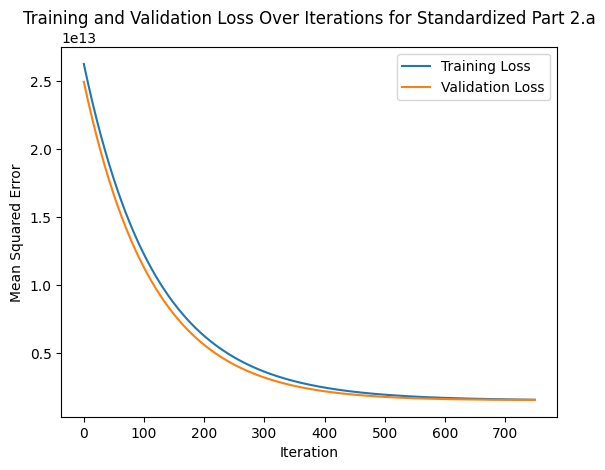

In [804]:
# @title
vars_2a_train_stand = np.c_[np.ones((train_len, 1)), train_stand_a[vars_1a]]
vars_2a_test_stand = np.c_[np.ones((test_len, 1)), test_stand_a[vars_1a]]
print('Standardized, stacked training set for part 2.a): \n\n', vars_2a_train_stand[:5])
print('\nStandardized, stacked test set for part 2.a): \n\n', vars_2a_test_stand[:5])

theta_2a_s = np.zeros(6)

iterations_2a_s = 750
alpha_2a_s = 0.002

# Doing the gradient descent for standardized inputs from part 1.a
train_losses, val_losses = gradient_descent(vars_2a_train_stand, vars_2a_test_stand, price_train, price_test, alpha_2a_s, theta_2a_s, iterations_2a_s)

# Linear model
print('\n The final theta values for the linear model of part 2.a) using 5 standardized inputs: \n', theta_2a_s)
print('\n')

print('Last loss value for the training set = ', train_losses[-1])
print('\nLast loss value for the test set = ', val_losses[-1])

# 4. Plot the training and validation loss after each iteration for standardized part 1.a
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Standardized Part 2.a")
plt.show()

In [805]:
# @title
# Problem 2.b) - Normalized Inputs

# Apply MinMax scaler to the training set columns for part 1.b) except the 'yes-no' and 'price' columns
train_norm_b = train
train_norm_b[vars_1b] = scaler_norm.fit_transform(train_norm_b[vars_1b])
print('Normalized training set for 2.b): \n')
train_norm_b.head()

Normalized training set for 2.b): 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0,1.0
41,7840000,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,1.0
91,6419000,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0,1.0
118,5950000,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,1.0
472,3010000,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.5


In [806]:
# @title
# Apply MinMax scaler to the testing set columns for part 1.b) except the 'yes-no' and 'price' columns
test_norm_b = test
test_norm_b[vars_1b] = scaler_norm.fit_transform(test_norm_b[vars_1b])
print('\n Normalized test set for 2.b): \n')
test_norm_b.head()


 Normalized test set for 2.b): 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,0.088172,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.5
54,7350000,0.311828,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0,0.5
171,5250000,0.617849,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0,0.5
244,4550000,0.263082,0.333333,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0,0.5
268,4382000,0.236559,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.5



Normalized, stacked training inputs for 2.b): 

 [[1.         0.4326093  0.4        0.         0.         1.
  1.         1.         0.         1.         0.33333333 0.        ]
 [1.         0.31495405 0.4        0.33333333 1.         1.
  0.         0.         0.         1.         0.         1.        ]
 [1.         0.34210526 0.2        0.         0.         1.
  1.         1.         0.         0.         0.66666667 1.        ]
 [1.         0.31913116 0.4        0.         0.         1.
  0.         1.         0.         1.         0.         1.        ]
 [1.         0.12489557 0.6        0.         0.33333333 1.
  0.         0.         0.         0.         1.         0.        ]]

Normalized, stacked test inputs for 2.b): 

 [[1.         0.08817204 0.33333333 0.         0.33333333 1.
  0.         0.         0.         0.         0.         1.        ]
 [1.         0.31182796 0.33333333 0.5        0.33333333 1.
  1.         0.         0.         1.         0.33333333 0.        ]


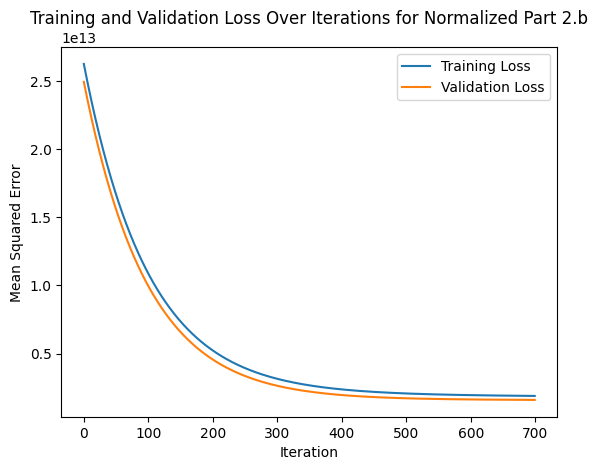

In [807]:
# @title
vars_2b_train_norm = np.c_[np.ones((train_len, 1)), train_norm_b[vars_1b]]
vars_2b_test_norm = np.c_[np.ones((test_len, 1)), test_norm_b[vars_1b]]
print('\nNormalized, stacked training inputs for 2.b): \n\n', vars_2b_train_norm[:5])
print('\nNormalized, stacked test inputs for 2.b): \n\n', vars_2b_test_norm[:5])

theta_2b_n = np.zeros(12)

iterations_2b_n = 700
alpha_2b_n = 0.001

# Doing the gradient descent for normalized inputs from part 1.b
train_losses, val_losses = gradient_descent(vars_2b_train_norm, vars_2b_test_norm, price_train, price_test, alpha_2b_n, theta_2b_n, iterations_2b_n)

# Linear model
print('\n The final theta values for the linear model of part 2.b) using 11 normalized inputs: \n', theta_2b_n)
print('\n')

print('Last loss value for the training set = ', train_losses[-1])
print('\nLast loss value for the test set = ', val_losses[-1])

# 4. Plot the training and validation loss after each iteration for normalized part 1.b
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Normalized Part 2.b")
plt.show()

In [808]:
# @title
# Problem 2.b) - Standardized Inputs

# Apply StandarScaler scaler to the training set columns for part 1.b) except the 'yes-no' and 'price' columns
train_stand_b = train
train_stand_b[vars_1b] = scaler_stand.fit_transform(train_stand_b[vars_1b])
print('Standardized training set for 2.b): \n')
train_stand_b.head()

Standardized training set for 2.b): 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,1.351873,0.078679,-0.579897,-0.929023,0.399468,2.193931,1.353207,-0.241355,1.525859,0.311484,-0.549083,1.0
41,7840000,0.565326,0.078679,1.410929,2.474792,0.399468,-0.455803,-0.738985,-0.241355,1.525859,-0.849261,1.821217,1.0
91,6419000,0.746837,-1.293483,-0.579897,-0.929023,0.399468,2.193931,1.353207,-0.241355,-0.655369,1.472229,1.821217,1.0
118,5950000,0.593251,0.078679,-0.579897,-0.929023,0.399468,-0.455803,1.353207,-0.241355,1.525859,-0.849261,1.821217,1.0
472,3010000,-0.705249,1.450841,-0.579897,0.205582,0.399468,-0.455803,-0.738985,-0.241355,-0.655369,2.632974,-0.549083,0.5


In [809]:
# @title
# Apply StandarScaler scaler to the testing set columns for part 1.b) except the 'yes-no' and 'price' columns
test_stand_b = test
test_stand_b[vars_1b] = scaler_stand.fit_transform(test_stand_b[vars_1b])
print('Standardized test set for 2.b): \n')
test_stand_b.head()

Standardized test set for 2.b): 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,4403000,-1.020953,-0.072023,-0.531775,0.308415,0.429863,-0.502865,-0.716860,-0.096225,-0.776493,-0.643743,1.742710,0.5
54,7350000,0.369177,-0.072023,1.466964,0.308415,0.429863,1.988604,-0.716860,-0.096225,1.287842,0.545545,-0.573819,0.5
171,5250000,2.271249,-0.072023,-0.531775,-0.936669,0.429863,-0.502865,-0.716860,-0.096225,-0.776493,0.545545,1.742710,0.5
244,4550000,0.066200,-0.072023,-0.531775,0.308415,0.429863,1.988604,1.394972,-0.096225,-0.776493,-0.643743,1.742710,0.5
268,4382000,-0.098656,1.236396,-0.531775,0.308415,0.429863,-0.502865,-0.716860,-0.096225,1.287842,-0.643743,-0.573819,0.5



Standardized, stacked training inputs for 2.b): 

 [[1.         0.4326093  0.4        0.         0.         1.
  1.         1.         0.         1.         0.33333333 0.        ]
 [1.         0.31495405 0.4        0.33333333 1.         1.
  0.         0.         0.         1.         0.         1.        ]
 [1.         0.34210526 0.2        0.         0.         1.
  1.         1.         0.         0.         0.66666667 1.        ]
 [1.         0.31913116 0.4        0.         0.         1.
  0.         1.         0.         1.         0.         1.        ]
 [1.         0.12489557 0.6        0.         0.33333333 1.
  0.         0.         0.         0.         1.         0.        ]]

Standardized, stacked test inputs for 2.b): 

 [[1.         0.08817204 0.33333333 0.         0.33333333 1.
  0.         0.         0.         0.         0.         1.        ]
 [1.         0.31182796 0.33333333 0.5        0.33333333 1.
  1.         0.         0.         1.         0.33333333 0.      

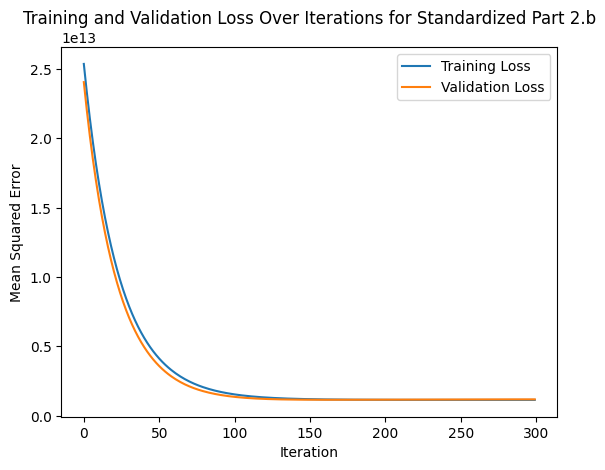

In [810]:
# @title
vars_2b_train_stand = np.c_[np.ones((train_len, 1)), train_stand_b[vars_1b]]
vars_2b_test_stand = np.c_[np.ones((test_len, 1)), test_stand_b[vars_1b]]
print('\nStandardized, stacked training inputs for 2.b): \n\n', vars_2b_train_norm[:5])
print('\nStandardized, stacked test inputs for 2.b): \n\n', vars_2b_test_norm[:5])

theta_2b_s = np.zeros(12)

iterations_2b_s = 300
alpha_2b_s = 0.01

# Doing the gradient descent for standardized inputs from part 1.b
train_losses, val_losses = gradient_descent(vars_2b_train_stand, vars_2b_test_stand, price_train, price_test, alpha_2b_s, theta_2b_s, iterations_2b_s)

# Linear model
print('\n The final theta values for the linear model of part 2.b) using 11 standardized inputs: \n', theta_2b_s)
print('\n')

print('Last loss value for the training set = ', train_losses[-1])
print('\nLast loss value for the test set = ', val_losses[-1])

# 4. Plot the training and validation loss after each iteration for standardized part 1.b
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Standardized Part 2.b")
plt.show()

In [811]:
# @title
# Problem 3

def gradient_descent_penalty(train, test, price_train, price_test, alpha, theta, iterations, pen_par):
    train_losses = []
    val_losses = []

    for iteration in range(iterations):
        gradients = 2/(len(train)) * train.T.dot(train.dot(theta) - price_train)
        theta -= alpha * gradients
        train_loss = (1/len(train)) * (np.sum(np.square(train.dot(theta) - price_train)) + pen_par*np.square(np.sum(theta)))
        val_loss = (1/len(test)) * np.sum(np.square(test.dot(theta) - price_test))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses



Normalized, stacked training inputs for 3.a): 

 [[1.         0.4326093  0.4        0.         0.         0.33333333]
 [1.         0.31495405 0.4        0.33333333 1.         0.        ]
 [1.         0.34210526 0.2        0.         0.         0.66666667]
 [1.         0.31913116 0.4        0.         0.         0.        ]
 [1.         0.12489557 0.6        0.         0.33333333 1.        ]]

Normalized, stacked test inputs for 3.a): 

 [[1.         0.08817204 0.33333333 0.         0.33333333 0.        ]
 [1.         0.31182796 0.33333333 0.5        0.33333333 0.33333333]
 [1.         0.61784946 0.33333333 0.         0.         0.33333333]
 [1.         0.26308244 0.33333333 0.         0.33333333 0.        ]
 [1.         0.23655914 0.66666667 0.         0.33333333 0.        ]]

 The final theta values for the linear model of part 3.a) using 5 normalized inputs and parameter penalties: 
 [2748774.08687985 2241469.53445835 1403378.33823219 1890606.22835232
 1700062.10544849 1465006.81059

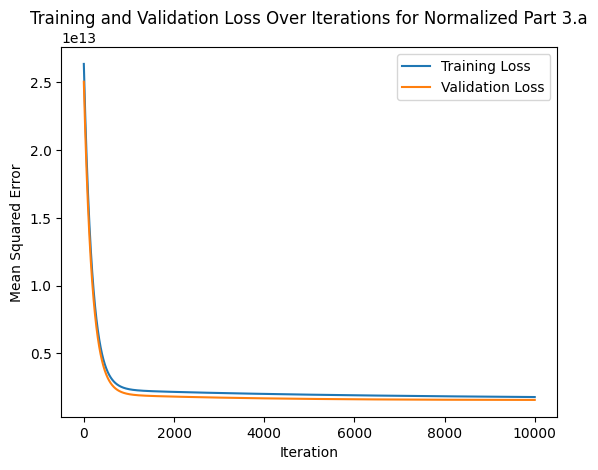

In [812]:
# @title
# Problem 3.a) - Normalized Inputs

vars_3a_train_norm = vars_2a_train_norm
vars_3a_test_norm = vars_2a_test_norm
print('\nNormalized, stacked training inputs for 3.a): \n\n', vars_3a_train_norm[:5])
print('\nNormalized, stacked test inputs for 3.a): \n\n', vars_3a_test_norm[:5])

theta_3a_n = np.zeros(6)

iterations_3a_n = 10000
alpha_3a_n = 0.001
pen_par = 0.000000001

# Doing the gradient descent for normalized inputs from part 1.a
train_losses_3an, val_losses_3an = gradient_descent_penalty(vars_3a_train_norm, vars_3a_test_norm, price_train, price_test, alpha_3a_n, theta_3a_n, iterations_3a_n, pen_par)

# Linear model
print('\n The final theta values for the linear model of part 3.a) using 5 normalized inputs and parameter penalties: \n', theta_3a_n)
print('\n')

print('Last loss value for the training set = ', train_losses_3an[-1])
print('\nLast loss value for the test set = ', val_losses_3an[-1])

# 4. Plot the training and validation loss after each iteration for normalized part 1.a
plt.plot(train_losses_3an, label="Training Loss")
plt.plot(val_losses_3an, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Normalized Part 3.a")
plt.show()


Standardized, stacked training inputs for 3.a): 

 [[ 1.          1.35187274  0.07867901 -0.57989658 -0.92902305  0.31148433]
 [ 1.          0.56532627  0.07867901  1.41092949  2.4747925  -0.8492607 ]
 [ 1.          0.746837   -1.29348292 -0.57989658 -0.92902305  1.47222936]
 [ 1.          0.593251    0.07867901 -0.57989658 -0.92902305 -0.8492607 ]
 [ 1.         -0.7052488   1.45084094 -0.57989658  0.20558213  2.6329744 ]]

Standardized, stacked test inputs for 3.a): 

 [[ 1.         -1.02095327 -0.07202305 -0.53177451  0.30841537 -0.64374278]
 [ 1.          0.3691766  -0.07202305  1.46696416  0.30841537  0.54554473]
 [ 1.          2.27124853 -0.07202305 -0.53177451 -0.93666891  0.54554473]
 [ 1.          0.06619958 -0.07202305 -0.53177451  0.30841537 -0.64374278]
 [ 1.         -0.09865556  1.23639571 -0.53177451  0.30841537 -0.64374278]]

 The final theta values for the linear model of part 3.a) using 5 standardized inputs and parameter penalties: 
 [4795729.22018337  729932.35590403

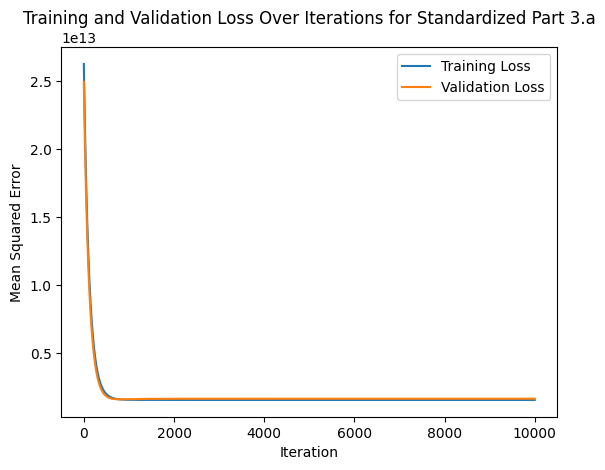

In [813]:
# @title
# Problem 3.a) - Standardized Inputs

vars_3a_train_stand = vars_2a_train_stand
vars_3a_test_stand = vars_2a_test_stand
print('\nStandardized, stacked training inputs for 3.a): \n\n', vars_3a_train_stand[:5])
print('\nStandardized, stacked test inputs for 3.a): \n\n', vars_3a_test_stand[:5])

theta_3a_s = np.zeros(6)

iterations_3a_s = 10000
alpha_3a_s = 0.002
pen_par = 0.000001

# Doing the gradient descent for standardized inputs from part 1.a
train_losses_3as, val_losses_3as = gradient_descent_penalty(vars_3a_train_stand, vars_3a_test_stand, price_train, price_test, alpha_3a_s, theta_3a_s, iterations_3a_s, pen_par)

# Linear model
print('\n The final theta values for the linear model of part 3.a) using 5 standardized inputs and parameter penalties: \n', theta_3a_s)
print('\n')

print('Last loss value for the training set = ', train_losses_3as[-1])
print('\nLast loss value for the test set = ', val_losses_3as[-1])

# 4. Plot the training and validation loss after each iteration for standardized part 1.a
plt.plot(train_losses_3as, label="Training Loss")
plt.plot(val_losses_3as, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Standardized Part 3.a")
plt.show()


Normalized, stacked training inputs for 3.b): 

 [[1.         0.4326093  0.4        0.         0.         1.
  1.         1.         0.         1.         0.33333333 0.        ]
 [1.         0.31495405 0.4        0.33333333 1.         1.
  0.         0.         0.         1.         0.         1.        ]
 [1.         0.34210526 0.2        0.         0.         1.
  1.         1.         0.         0.         0.66666667 1.        ]
 [1.         0.31913116 0.4        0.         0.         1.
  0.         1.         0.         1.         0.         1.        ]
 [1.         0.12489557 0.6        0.         0.33333333 1.
  0.         0.         0.         0.         1.         0.        ]]

Normalized, stacked test inputs for 3.b): 

 [[1.         0.08817204 0.33333333 0.         0.33333333 1.
  0.         0.         0.         0.         0.         1.        ]
 [1.         0.31182796 0.33333333 0.5        0.33333333 1.
  1.         0.         0.         1.         0.33333333 0.        ]


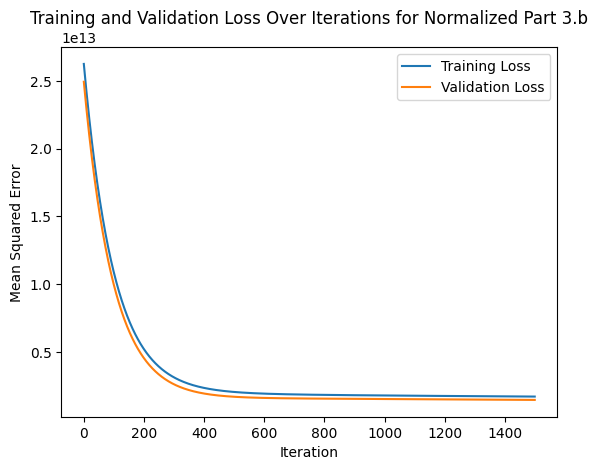

In [814]:
# @title
# Problem 3.b) Normalized Inputs

vars_3b_train_norm = vars_2b_train_norm
vars_3b_test_norm = vars_2b_test_norm
print('\nNormalized, stacked training inputs for 3.b): \n\n', vars_3b_train_norm[:5])
print('\nNormalized, stacked test inputs for 3.b): \n\n', vars_3b_test_norm[:5])

theta_3b_n = np.zeros(12)

iterations_3b_n = 1500
alpha_3b_n = 0.001
pen_par = 0.00000001

# Doing the gradient descent for normalized inputs from part 1.b
train_losses_3bn, val_losses_3bn = gradient_descent_penalty(vars_3b_train_norm, vars_3b_test_norm, price_train, price_test, alpha_3b_n, theta_3b_n, iterations_3b_n, pen_par)

# Linear model
print('\n The final theta values for the linear model of part 3.b) using 11 normalized inputs and parameter penalties: \n', theta_3b_n)
print('\n')

print('Last loss value for the training set = ', train_losses_3bn[-1])
print('\nLast loss value for the test set = ', val_losses_3bn[-1])

# 4. Plot the training and validation loss after each iteration for normalized part 1.b
plt.plot(train_losses_3bn, label="Training Loss")
plt.plot(val_losses_3bn, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Normalized Part 3.b")
plt.show()


 Standardized, stacked training inputs for 3.b): 

 [[ 1.          1.35187274  0.07867901 -0.57989658 -0.92902305  0.39946773
   2.19393102  1.35320687 -0.2413554   1.52585854  0.31148433 -0.54908336]
 [ 1.          0.56532627  0.07867901  1.41092949  2.4747925   0.39946773
  -0.45580284 -0.73898531 -0.2413554   1.52585854 -0.8492607   1.82121709]
 [ 1.          0.746837   -1.29348292 -0.57989658 -0.92902305  0.39946773
   2.19393102  1.35320687 -0.2413554  -0.65536875  1.47222936  1.82121709]
 [ 1.          0.593251    0.07867901 -0.57989658 -0.92902305  0.39946773
  -0.45580284  1.35320687 -0.2413554   1.52585854 -0.8492607   1.82121709]
 [ 1.         -0.7052488   1.45084094 -0.57989658  0.20558213  0.39946773
  -0.45580284 -0.73898531 -0.2413554  -0.65536875  2.6329744  -0.54908336]]

 Standardized, stacked test inputs for 3.b): 

 [[ 1.         -1.02095327 -0.07202305 -0.53177451  0.30841537  0.42986348
  -0.50286535 -0.71686044 -0.09622504 -0.77649287 -0.64374278  1.74270968]
 [ 

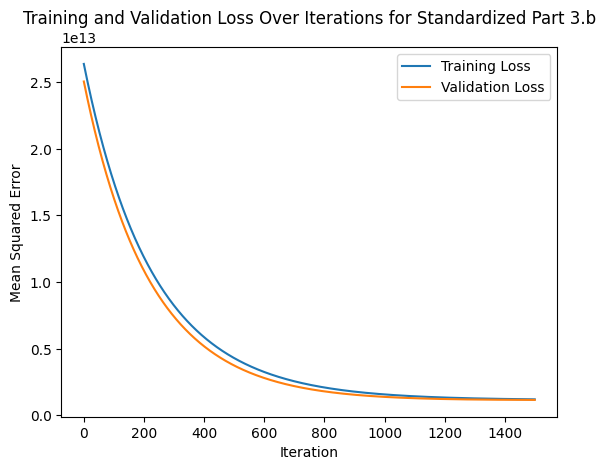

In [815]:
# @title
# Problem 3.b) Standardized Inputs

vars_3b_train_stand = vars_2b_train_stand
vars_3b_test_stand = vars_2b_test_stand
print('\n Standardized, stacked training inputs for 3.b): \n\n', vars_3b_train_stand[:5])
print('\n Standardized, stacked test inputs for 3.b): \n\n', vars_3b_test_stand[:5])

theta_3b_s = np.zeros(12)

iterations_3b_s = 1500
alpha_3b_s = 0.001
pen_par = 0.00000001

# Doing the gradient descent for normalized inputs from part 1.b
train_losses_3bs, val_losses_3bs = gradient_descent_penalty(vars_3b_train_stand, vars_3b_test_stand, price_train, price_test, alpha_3b_s, theta_3b_s, iterations_3b_s, pen_par)

# Linear model
print('\n The final theta values for the linear model of part 3.b) using 11 standardized inputs and paramter penalties: \n', theta_3b_s)
print('\n')

print('Last loss value for the training set = ', train_losses_3bs[-1])
print('\nLast loss value for the test set = ', val_losses_3bs[-1])

# 4. Plot the training and validation loss after each iteration for normalized part 1.b
plt.plot(train_losses_3bs, label="Training Loss")
plt.plot(val_losses_3bs, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations for Standardized Part 3.b")
plt.show()